### Load Modules

In [361]:

import numpy as np
import pandas as pd
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import skew

import sklearn.model_selection as ms
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import xgboost


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pprint import pprint
import warnings

### Load Data

In [362]:


os.chdir(r"C:\Users\jtlqh\bootcamp\my_projects\kaggle")

train = pd.read_csv("./train.csv")
test=pd.read_csv("./test.csv")

### EDA

In [363]:
print(train.shape)
print(test.shape)


(1460, 81)
(1459, 80)


In [364]:
print(train.columns)
train.info()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [365]:
df=pd.concat([train.iloc[:,:-1],test])
df.shape

(2919, 80)

In [366]:
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 100)

df.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [367]:
numeric_feat=['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd',\
'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',\
'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',\
'GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',\
'PoolArea','MiscVal','MoSold','YrSold']

categorical_feat=['MSZoning','Street','Alley','LotShape','LandContour','Utilities',\
'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',\
'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond',\
'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',\
'HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType',\
'GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature',\
'SaleType','SaleCondition']

In [368]:
df[numeric_feat].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [369]:
df[categorical_feat].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,2919,2919,2919,2919,2919,2918,2918,2895,2919,2919,2919,2838,2837,2837,2840,2839,2919,2919,2919,2918,2918,2917,1499,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,2889,2425,1471,2310,2876,1025,1014,1742,1798,2538,1308,1283,2606,1904,851,2493,2874,1493,2723,2671,1492,2717,744,1723,1230,2604,2654,2641,4,329,95,2525,2402


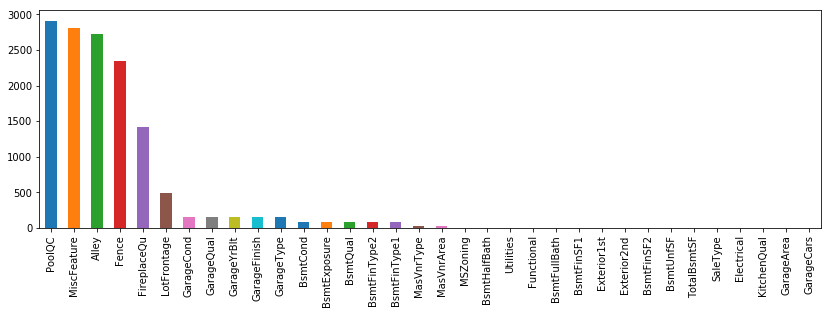

In [370]:
plt.rcParams['figure.figsize']= [14.0, 4.0]
missing=df.isna().sum().sort_values(ascending=False)
missing[missing>0].plot(kind='bar')

### Data Processing

#### missing garage data are not at random
Peeking at the missing entries for garage related data, they are not at random, it is reasonable to them filled with "None" for categorical or 0 for numerical.

In [371]:
garage_list = [i for i in df.columns if str(i).startswith("Garage")]
print(df[garage_list].info())
df[df['GarageCond'].isna()][garage_list].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 7 columns):
GarageType      2762 non-null object
GarageYrBlt     2760 non-null float64
GarageFinish    2760 non-null object
GarageCars      2918 non-null float64
GarageArea      2918 non-null float64
GarageQual      2760 non-null object
GarageCond      2760 non-null object
dtypes: float64(3), object(4)
memory usage: 182.4+ KB
None


,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0.0,0.0,NaN,NaN
48,NaN,NaN,NaN,0.0,0.0,NaN,NaN
78,NaN,NaN,NaN,0.0,0.0,NaN,NaN
88,NaN,NaN,NaN,0.0,0.0,NaN,NaN
89,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [372]:
for i in garage_list:    
    if df[i].dtypes !='float64': df[i].fillna("None", inplace=True)
    else: df[i].fillna(0, inplace=True)


In [373]:
# fill LotFrontage missings with median value in the same neighborhood

df['LotFrontage'] = df[['Neighborhood','LotFrontage']].groupby('Neighborhood').transform(lambda x: x.fillna(x.median()))


for i in ['MiscFeature','Fence','PoolQC','Alley','FireplaceQu']:
    df[i].fillna("None", inplace=True)   

# impute MSZoning missings as the most frequent value in the same MSSubClass
df['MSZoning'] = df[['MSSubClass', 'MSZoning']].groupby('MSSubClass').transform(lambda x: x.fillna(x.mode()[0]))

df['Utilities'].fillna(df['Utilities'].mode()[0], inplace=True)

df['Exterior1st'].fillna('Wd Sdng',inplace=True)
df['Exterior2nd'].fillna('Wd Sdng',inplace=True)

#### Basement missing data are not at random
Peeking into the basement related columns, it is resonable to impute BsmtQual missings with the same BsmtCond non-empty values.

In [374]:
df['BsmtQual'].fillna(df['BsmtCond'],inplace=True)

bsmt_list = [i for i in df.columns if "Bsmt" in i]
print(df[bsmt_list].info())

for i in bsmt_list:    
    if df[i].dtypes !='float64': df[i].fillna("None", inplace=True)
    else: df[i].fillna(0, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 11 columns):
BsmtQual        2840 non-null object
BsmtCond        2837 non-null object
BsmtExposure    2837 non-null object
BsmtFinType1    2840 non-null object
BsmtFinSF1      2918 non-null float64
BsmtFinType2    2839 non-null object
BsmtFinSF2      2918 non-null float64
BsmtUnfSF       2918 non-null float64
TotalBsmtSF     2918 non-null float64
BsmtFullBath    2917 non-null float64
BsmtHalfBath    2917 non-null float64
dtypes: float64(6), object(5)
memory usage: 273.7+ KB
None


In [375]:
df['Electrical']=df.groupby('Neighborhood')['Electrical'].transform(lambda x: x.fillna(x.mode()[0]))
df['KitchenQual']=df.groupby('Neighborhood')['KitchenQual'].transform(lambda x: x.mode()[0])

df['MasVnrType'].fillna('None', inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)

df['Functional'].fillna(df['Functional'].mode()[0], inplace=True)

df['SaleType'].fillna(df['SaleType'].mode()[0], inplace=True)

In [376]:
df.isna().any().sum()

# checking is there is any more missing entries

0

### Feature Engineering

In [377]:
cat_df=df[categorical_feat]
numeric_df=df[numeric_feat]

In [378]:
numeric_df['TotalSF']=numeric_df[['1stFlrSF', '2ndFlrSF','TotalBsmtSF']].apply(np.sum, axis=1)
cat_df['Has2ndFlr'] = df['2ndFlrSF'].apply(lambda x: 'yes' if x>0 else 'no')
cat_df['HasBsmt'] = df['TotalBsmtSF'].apply(lambda x: 'yes' if x>0 else 'no')
cat_df['HasScreenPorch']=numeric_df['ScreenPorch'].apply(lambda x: 'yes' if x>0 else 'no')
cat_df['Has3SsnPorch']=numeric_df['3SsnPorch'].apply(lambda x: 'yes' if x>0 else 'no')
cat_df['HasEnclosedPorch']=numeric_df['EnclosedPorch'].apply(lambda x: 'yes' if x>0 else 'no')
cat_df['HasOpenPorch']=numeric_df['OpenPorchSF'].apply(lambda x: 'yes' if x>0 else 'no')
cat_df['HasWoodDeck']=numeric_df['WoodDeckSF'].apply(lambda x: 'yes' if x>0 else 'no')
cat_df['HasGarage']=numeric_df['GarageArea'].apply(lambda x: 'yes' if x>0 else 'no')
cat_df['HasPool']=numeric_df['PoolArea'].apply(lambda x: 'yes' if x>0 else 'no')
numeric_df['Bath']=numeric_df[['FullBath','BsmtFullBath']].apply(np.sum,axis=1) + \
    numeric_df[['HalfBath','BsmtHalfBath']].apply(lambda x: 0.5*np.sum(x), axis=1)
#cat_df['BsmtFin']=numeric_df[['BsmtFinSF1','BsmtFinSF2']].apply(np.sum, axis=1).apply(lambda x: 1 if x>0 else 0)


numeric_df['PorchSF'] = numeric_df[['ScreenPorch','3SsnPorch','EnclosedPorch','OpenPorchSF','WoodDeckSF']].apply(np.sum, axis=1)
numeric_df['YearBuiltModeled'] = numeric_df['YearRemodAdd']-numeric_df['YearBuilt']+1
numeric_df.shape

numeric_df.drop(columns=['1stFlrSF', '2ndFlrSF','TotalBsmtSF','FullBath','BsmtFullBath','HalfBath','BsmtHalfBath',\
                         'BsmtFinSF1', 'BsmtFinSF2', 'GarageArea','YearBuilt', 'YearRemodAdd',\
                        'ScreenPorch','3SsnPorch','EnclosedPorch','OpenPorchSF','WoodDeckSF','PoolArea'], inplace=True)


In [379]:
print(numeric_df.shape)
print(cat_df.shape)


(2919, 22)
(2919, 52)


In [380]:
skew_features = numeric_df.apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
skew_index

Index(['MiscVal', 'LotArea', 'LowQualFinSF', 'KitchenAbvGr', 'MasVnrArea',
       'YearBuiltModeled', 'TotalSF', 'LotFrontage', 'PorchSF', 'MSSubClass',
       'GrLivArea', 'BsmtUnfSF', 'TotRmsAbvGrd', 'Fireplaces', 'OverallCond'],
      dtype='object')

In [381]:
numeric_df[skew_index] = numeric_df[skew_index].apply(lambda x: np.add(x,1), axis=0).apply(np.log, axis=0)
SalePrice=np.log(train.SalePrice)

In [382]:
plt.rcParams['figure.figsize']= [10.0, 4.0]

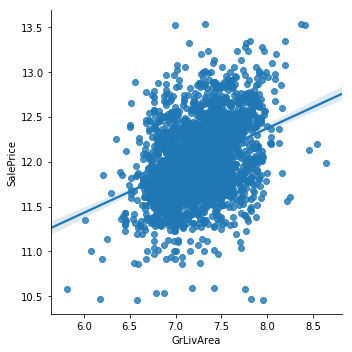

In [383]:
data=pd.concat([numeric_df.GrLivArea[train.index], SalePrice], axis=1)
sns.lmplot(x='GrLivArea', y= 'SalePrice', data=data)


[1298, 1089]


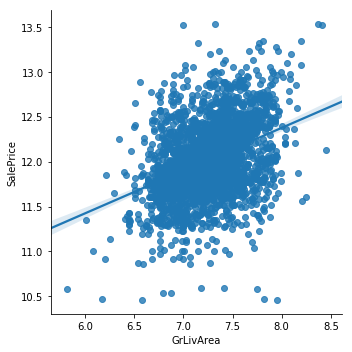

In [386]:
#print(numeric_df[numeric_df.GrLivArea>8.5].index.tolist())

#outlier=[1298, 1089]
outlier = []
sns.lmplot(x='GrLivArea', y= 'SalePrice',data=data.drop(outlier))

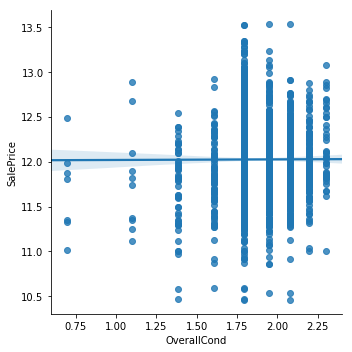

In [288]:
data=pd.concat([numeric_df.OverallCond[train.index], SalePrice], axis=1)
sns.lmplot(x='OverallCond', y= 'SalePrice', data=data)


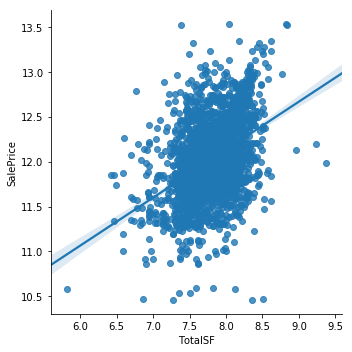

In [289]:
data=pd.concat([numeric_df.TotalSF[train.index], SalePrice], axis=1)
sns.lmplot(x='TotalSF', y= 'SalePrice', data=data)


In [290]:
numeric_df[numeric_df.TotalSF>9].TotalSF

1298    9.371864
1089    9.229260
Name: TotalSF, dtype: float64

In [291]:
outlier

[1298, 1089]

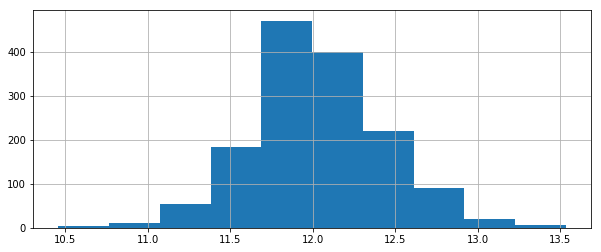

In [292]:
SalePrice.hist()


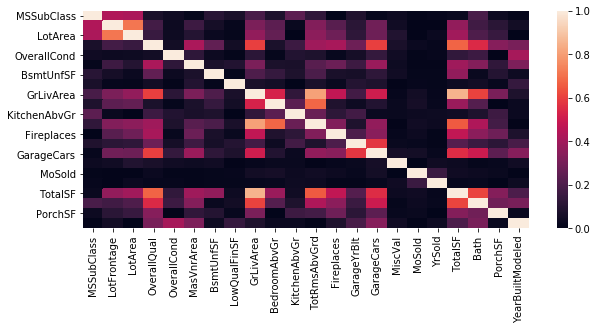

In [293]:
#numeric_df.drop(columns=col_to_drop,inplace=True)
num_cor = numeric_df.corr().apply(abs)
sns.heatmap(num_cor)


In [294]:
feature_dummy = pd.get_dummies(pd.concat([numeric_df, cat_df], axis=1))
print(feature_dummy.shape)
feature_dummy.mode()

overfit_list=[]
ln = feature_dummy.shape[0]
for i in feature_dummy.columns:
    dominant = feature_dummy[i].value_counts().iloc[0]/ln > .997
    if dominant>.997: overfit_list.append(i)

feature_dummy.drop(columns=overfit_list, inplace=True)
print(feature_dummy.shape)
feature_dummy.head()

(2919, 305)
(2919, 258)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MiscVal,MoSold,YrSold,TotalSF,Bath,PorchSF,YearBuiltModeled,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,PavedDrive_P,PavedDrive_Y,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_ConLD,SaleType_ConLI,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Has2ndFlr_no,Has2ndFlr_yes,HasBsmt_no,HasBsmt_yes,HasScreenPorch_no,HasScreenPorch_yes,Has3SsnPorch_no,Has3SsnPorch_yes,HasEnclosedPorch_no,HasEnclosedPorch_yes,HasOpenPorch_no,HasOpenPorch_yes,HasWoodDeck_no,HasWoodDeck_yes,HasGarage_no,HasGarage_yes,HasPool_no,HasPool_yes
0,4.110874,4.189655,9.042040,7,1.791759,5.283204,5.017280,0.0,7.444833,3,0.693147,2.197225,0.000000,2003.0,2.0,0.0,2,2008,7.850493,3.5,4.127134,0.693147,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,...,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0
1,3.044522,4.394449,9.169623,6,2.197225,0.000000,5.652489,0.0,7.141245,3,0.693147,1.945910,0.693147,1976.0,2.0,0.0,5,2007,7.833996,2.5,5.700444,0.693147,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,...,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,1,0
2,4.110874,4.234107,9.328212,7,1.791759,5.093750,6.075346,0.0,7.488294,3,0.693147,1.945910,0.693147,2001.0,2.0,0.0,9,2008,7.903596,3.5,3.761200,1.098612,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0
3,4.262680,4.110874,9.164401,7,1.791759,0.000000,6.293419,0.0,7.448916,3,0.693147,2.079442,0.693147,1998.0,3.0,0.0,2,2006,7.813592,2.0,5.730100,4.043051,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,1,1,0
4,4.110874,4.442651,9.565284,8,1.791759,5.860786,6.196444,0.0,7.695758,4,0.693147,2.302585,0.693147,2000.0,3.0,0.0,12,2008,8.114923,3.5,5.624018,0.693147,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0


### Regression Modeling

In [295]:
def get_error(X_train,y_train,X_test,y_test, model, show = True, refit = True):
    if refit: model.fit(X_train, y_train)
    train_error = 1 - r2_score(y_train, model.predict(X_train))
    test_error = 1 - r2_score(y_test,model.predict(X_test))
    if show:
        print("train error ", train_error)
        print("test error", test_error)
    return [train_error, test_error]



In [296]:
train_index = train.drop(index=outlier).index
#train_index = train.index

X_train, X_test, y_train, y_test = ms.train_test_split(feature_dummy.iloc[train_index,], \
                                                       SalePrice[train_index], test_size=0.2, random_state=108)
#X_train, X_test, y_train, y_test = ms.train_test_split(feature_dummy.iloc[train_index,:], train.iloc[train_index,]['SalePrice'], test_size=0.2, random_state=108)
X_train.shape

(1166, 258)

#### Ridge Regression

ridge=Ridge(random_state=108)
grid_para = dict(alpha = np.logspace(-5,3,20))

grid_search_ridge = ms.GridSearchCV(ridge,  cv=5, param_grid=grid_para, n_jobs=-1)
%time grid_search_ridge.fit(X_train,y_train)  # What to call to trigger the gridSearchCV
ridge=grid_search_ridge.best_estimator_

print(ridge)
get_error(X_train,y_train,X_test,y_test,ridge, True,False)      

In [297]:
ridge=make_pipeline(RobustScaler(), RidgeCV(alphas=np.logspace(-5,3,20), store_cv_values=True))
ridge.fit(X_train,y_train)
get_error(X_train, y_train, X_test, y_test, ridge, True, False)

train error  0.0693093447129618
test error 0.0779100309849361


[0.0693093447129618, 0.0779100309849361]

#### Lasso Regression

lasso = Lasso(tol=0.001,max_iter=1000, random_state=108)

#run a grid search to find error rates for max_depths ranging 1-30
grid_para = dict(alpha = np.logspace(-5,3,20))
lasso.set_params(random_state=108)

grid_search_lasso = ms.GridSearchCV(lasso,  cv=5, param_grid=grid_para, n_jobs=-1)
%time grid_search_lasso.fit(X_train,y_train)  # What to call to trigger the gridSearchCV
lasso=grid_search_lasso.best_estimator_
print(lasso)
get_error(X_train,y_train,X_test,y_test,lasso)  

pd.Series(dict(zip(X_train.columns,lasso.coef_))).sort_values(ascending=False)[:25].plot('barh')


In [298]:
lasso=make_pipeline(RobustScaler(), LassoCV(alphas=np.logspace(-5,3,20), random_state=108))
lasso.fit(X_train,y_train)
get_error(X_train, y_train, X_test, y_test, lasso, True, False)

train error  0.06840192668398115
test error 0.07914506315528569


[0.06840192668398115, 0.07914506315528569]

#### Elastic Net Regression

net   = ElasticNet(tol=0.04) # need to increase tolerance to reach convergence

#run a grid search to find error rates for max_depths ranging 1-30
grid_para = dict(alpha = np.logspace(-5,-3,10),
                l1_ratio =np.logspace(-3,1,5))
net.set_params(random_state=108)
grid_search_net = ms.GridSearchCV(net,  cv=5, param_grid=grid_para, n_jobs=-1, verbose=2)
%time grid_search_net.fit(X_train,y_train)  # What to call to trigger the gridSearchCV
net=grid_search_net.best_estimator_
print(net)
get_error(X_train,y_train,X_test,y_test,net)  

In [299]:
net=make_pipeline(RobustScaler(), ElasticNetCV(alphas=np.logspace(-5,3,20), l1_ratio=np.logspace(-3,1,5),random_state=108))
net.fit(X_train,y_train)
get_error(X_train, y_train, X_test, y_test, net, True, False)

train error  0.06840192668398115
test error 0.07914506315528569


[0.06840192668398115, 0.07914506315528569]

#### Random Forest

In [317]:

rf = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=15,
           max_features=17, max_leaf_nodes=None,
           min_impurity_decrease=1e-06, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0001, n_estimators=222, n_jobs=None,
           oob_score=False, random_state=108, verbose=0, warm_start=False)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())
rf.fit(X_train,y_train)
get_error(X_train,y_train,X_test,y_test,rf)


Parameters currently in use:

{'bootstrap': False,
 'criterion': 'mse',
 'max_depth': 15,
 'max_features': 17,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 1e-06,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0001,
 'n_estimators': 222,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 108,
 'verbose': 0,
 'warm_start': False}
train error  0.0016756599067454525
test error 0.11854461553150875


[0.0016756599067454525, 0.11854461553150875]

Wall time: 4.01 s
RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=18,
           max_features=17, max_leaf_nodes=None,
           min_impurity_decrease=1e-06, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0001, n_estimators=188, n_jobs=None,
           oob_score=False, random_state=108, verbose=0, warm_start=False)
train error  0.00044317706848306937
test error 0.12021372038342981


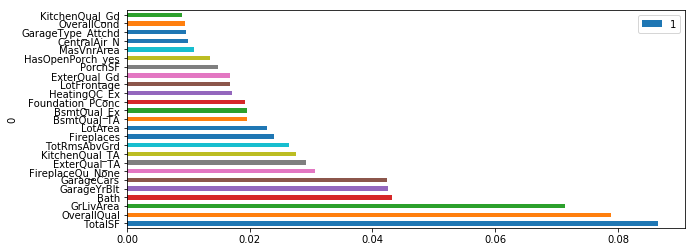

In [303]:
# use dummy dataframe for tree models

# Create the random grid
random_grid = {
               'max_features': range(15,20),
               'max_depth': range(15,20),
               'min_samples_split': [2,3],
               'min_samples_leaf': [1,2],
                'n_estimators': range(100,251,1),
              'min_weight_fraction_leaf':[0.0001],
              'min_impurity_decrease':[0.000001]
}
#pprint(random_grid)

grid_search_forest = ms.RandomizedSearchCV(rf, random_grid, cv = 5, verbose=0, n_jobs = -1, random_state=108)
#grid_search_forest = RandomizedSearchCV(rf, random_grid, cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)   # %time     is ipython magic command to measure the execution timebest_net=grid_search_net.best_estimator_

rf = grid_search_forest.best_estimator_
print(rf)
get_error(X_train,y_train,X_test,y_test,rf)  
importance_forest=(pd.DataFrame(sorted(zip(X_train.columns, rf.feature_importances_), key=lambda x: x[1], reverse=True)))

importance_forest[:25].plot(kind='barh', x=0, y=1)

#### Gradient Boosting Machine

In [305]:
# gradient boosting on label dataframe
gbmr = GradientBoostingRegressor()
interval=1000
n_estimators=41 * interval
gbmr.set_params(alpha=0.8, criterion='mse', init=None,
             learning_rate=0.021544346900318846, loss='ls', max_depth=4,
             max_features=4, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=4500,
             n_iter_no_change=None, presort='auto', random_state=108,
             subsample=0.9, tol=0.1, validation_fraction=0.2, verbose=0,
             warm_start=False)
gbmr.fit(X_train,y_train)
get_error(X_train,y_train,X_test,y_test,gbmr)

train error  0.006462437633544371
test error 0.08783017659760639


[0.006462437633544371, 0.08783017659760639]

Wall time: 2min 44s
GradientBoostingRegressor(alpha=0.8, criterion='mse', init=None,
             learning_rate=0.021544346900318846, loss='ls', max_depth=3,
             max_features=4, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=4500,
             n_iter_no_change=None, presort='auto', random_state=108,
             subsample=0.9, tol=0.1, validation_fraction=0.2, verbose=0,
             warm_start=False)
train error  0.016685307023502793
test error 0.09285717934914006
[0.016685307023502793, 0.09285717934914006]


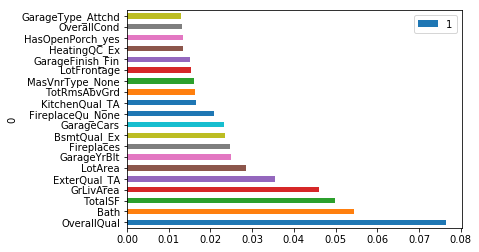

In [259]:
param_grid = {'n_estimators': range(3000,5000,500),
               'max_features': range(3,5),
               'max_depth': range(3,5),
               'min_samples_split': [2],
               'min_samples_leaf': [2],
               'learning_rate': np.logspace(-5,0,10),
                'subsample':[0.9]}
grid_search_gbmr =ms.GridSearchCV(gbmr, param_grid=param_grid, cv=5 ,return_train_score=True,n_jobs=-1)
#print(gbmr.get_params())
%time grid_search_gbmr.fit(X_train,y_train)

gbmr=grid_search_gbmr.best_estimator_
print(gbmr)
#print("best train error ", 1-r2_score(gbmr.predict(X_train), y_train))
#print("best test error ", 1-r2_score(gbmr.predict(X_test), y_test))
print(get_error(X_train, y_train, X_test, y_test, gbmr))

importance_gbmr=pd.DataFrame(sorted(zip(X_train.columns, gbmr.feature_importances_), key=lambda x: x[1], reverse=True))
importance_gbmr[:20].plot(kind='barh', x=0, y=1)

#### Support Vector Machine

In [308]:
svm = SVR(C= 498, epsilon= 0.001, gamma=.00001, max_iter=-1)
print(svm)
svm.fit(X_train, y_train)

get_error(X_train,y_train, X_test,y_test,svm, True,False)

SVR(C=498, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=1e-05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
train error  0.07251648146188105
test error 0.08096674357546785


[0.07251648146188105, 0.08096674357546785]

In [307]:
grid_para_svm = [
    {'C': [498],#range(400,500,1),
     'gamma': [0.00004],#np.logspace(-5,-4,11),
     'epsilon': np.logspace(-4,-2,20),
     'degree': [3],
     'kernel': ['rbf']}
]
grid_search_svm = ms.GridSearchCV(svm, param_grid=grid_para_svm, cv=5, return_train_score=True,  n_jobs=-1)
%time grid_search_svm.fit(X_train, y_train)

svm =grid_search_svm.best_estimator_
print(svm)

print(get_error(X_train,y_train, X_test, y_test, svm))


Wall time: 15.2 s
SVR(C=498, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=4e-05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
train error  0.050735385805385835
test error 0.08305816328843119
[0.050735385805385835, 0.08305816328843119]


#### Xgboost Regression

In [309]:

n_estimators= 50000
warnings.filterwarnings('ignore')
xgb = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=0.7, colsample_bytree=0.4, gamma=0,
       importance_type='gain', learning_rate=0.01, max_delta_step=0,
       max_depth=6, min_child_weight=1.1, missing=None, n_estimators=2000,
       n_jobs=-1, nthread=-1, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
print(xgb.get_params())

%time xgb.fit(X_train, y_train, eval_metric='rmse', eval_set=[(X_test, y_test)], early_stopping_rounds=12,verbose=False)
get_error(X_train,y_train,X_test,y_test,xgb, True,False)


{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 0.7, 'colsample_bytree': 0.4, 'gamma': 0, 'importance_type': 'gain', 'learning_rate': 0.01, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1.1, 'missing': None, 'n_estimators': 2000, 'n_jobs': -1, 'nthread': -1, 'objective': 'reg:squarederror', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
Wall time: 2.39 s
train error  0.016251036747574554
test error 0.08654909060279214


[0.016251036747574554, 0.08654909060279214]

In [310]:
params = {'n_estimators': range(1000,10000,1000), 'max_depth':[5,6,7], 'min_child_weight':[1.1,1.2,1.3] }

#dtrain = xgboost.DMatrix(X_train, y_train)
#dtest = xgboost.DMatrix(X_test, y_test)
grid_search_xgb = ms.GridSearchCV(xgb, params, cv=5, return_train_score=True, n_jobs=-1)
%time grid_search_xgb.fit(X_train, y_train, eval_metric='rmse', eval_set=[(X_test, y_test)], early_stopping_rounds=11,verbose=False)

xgb=grid_search_xgb.best_estimator_
print(xgb)

get_error(X_train,y_train,X_test,y_test,xgb, True,False)

Wall time: 7min 20s
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=0.7, colsample_bytree=0.4, gamma=0,
       importance_type='gain', learning_rate=0.01, max_delta_step=0,
       max_depth=7, min_child_weight=1.1, missing=None, n_estimators=2000,
       n_jobs=-1, nthread=-1, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
train error  0.011337880423456514
test error 0.08684811120414115


[0.011337880423456514, 0.08684811120414115]


### Asembling all models

In [318]:
svm = make_pipeline(RobustScaler(), SVR(C= 498, epsilon=0.01, gamma=4e-05))


In [350]:
models_name = ['ridge', 'lasso', 'elasticNet' ,'forest', 'gradient boost', 'svm', 'xgboost']

#models = [ridge, lasso, net, rf, gbmr, svm, xgb]
models = [ridge, lasso, net, rf, gbmr, svm, xgb]

pd.DataFrame([get_error(X_train,y_train,X_test,y_test,model) for model in models], index=models_name, 
             columns=['Train_err', 'Test_err'])

train error  0.0693093447129618
test error 0.0779100309849361
train error  0.06840192668398115
test error 0.07914506315528569
train error  0.06840192668398115
test error 0.07914506315528569
train error  0.0016756599067454525
test error 0.11854461553150875
train error  0.006462437633544371
test error 0.08783017659760639
train error  0.06290929458059047
test error 0.07883630227664018
train error  0.011337880423456514
test error 0.08684811120414115


,Train_err,Test_err
ridge,0.069309,0.077910
lasso,0.068402,0.079145
elasticNet,0.068402,0.079145
forest,0.001676,0.118545
gradient boost,0.006462,0.087830
svm,0.062909,0.078836
xgboost,0.011338,0.086848


#### kfold cross verification

In [322]:
X=feature_dummy.iloc[train_index]
y=SalePrice[train_index]
ms_k3 = ms.KFold(n_splits=5)

In [323]:

kscores=[]
for i,model in enumerate(models):
    print(models_name[i])
    kscores.append(ms.cross_val_score(estimator=model, X=X, y=y, cv=ms_k3))

ridge
lasso
forest
gradient boost
svm
xgboost


In [324]:

score_df=pd.DataFrame(kscores,models_name[:6])
mean=score_df.apply(np.mean,axis=1)
std=score_df.apply(np.std,axis=1)
score_df=pd.concat([mean,std],axis=1)
score_df.columns=['mean_score','std_score']
score_df

,mean_score,std_score
ridge,0.909846,0.009737
lasso,0.912584,0.009400
forest,0.876348,0.013002
gradient boost,0.907753,0.007006
svm,0.911531,0.010725
xgboost,0.911642,0.009362


### Fit Models

In [351]:
for model in models:
    model.fit(X,y)
rmse = [np.sqrt(np.mean((y-model.predict(X))**2)) for model in models]

In [352]:
# model rmse
pd.Series(dict(zip(models_name, rmse)))

ridge             0.105259
lasso             0.106090
elasticNet        0.106090
forest            0.019376
gradient boost    0.038500
svm               0.101595
xgboost           0.044734
dtype: float64

### SalePrice Prediction

In [353]:
#checking  NaN
feature_dummy[feature_dummy.isin([np.nan, np.inf, -np.inf]).any(1)]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MiscVal,MoSold,YrSold,TotalSF,Bath,PorchSF,YearBuiltModeled,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,PavedDrive_P,PavedDrive_Y,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_ConLD,SaleType_ConLI,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Has2ndFlr_no,Has2ndFlr_yes,HasBsmt_no,HasBsmt_yes,HasScreenPorch_no,HasScreenPorch_yes,Has3SsnPorch_no,Has3SsnPorch_yes,HasEnclosedPorch_no,HasEnclosedPorch_yes,HasOpenPorch_no,HasOpenPorch_yes,HasWoodDeck_no,HasWoodDeck_yes,HasGarage_no,HasGarage_yes,HasPool_no,HasPool_yes


In [359]:
submissions = [x.predict(feature_dummy.tail(test.shape[0])) for x in models]

submissions = pd.DataFrame(submissions, index=models_name).T.apply(np.exp).apply(lambda x: np.round(x,1))
submissions.head()

,ridge,lasso,elasticNet,forest,gradient boost,svm,xgboost
0,115529.5,116734.9,116734.9,123466.8,126136.8,117177.2,121529.5
1,154182.5,154302.3,154302.3,151425.0,162274.2,164813.3,161281.1
2,181288.8,180424.1,180424.1,183727.3,186096.0,188890.4,189372.1
3,195059.5,195778.4,195778.4,193424.6,198417.8,198154.8,193665.6
4,198923.6,203547.2,203547.2,190171.5,184781.7,199909.5,185091.9


### Blending Models

In [360]:
submissions['blend'] = submissions.apply(lambda x: x['ridge']*.35 + x['svm']*.25 + \
                                         (x['lasso']+x['forest']+x['gradient boost']+x['xgboost'])*.1 , axis=1)\
                        .apply(lambda x: np.round(x,1))
#submissions['blend'] = submissions.apply(np.mean , axis=1)\
#                        .apply(lambda x: np.round(x,1))

submissions['Id']=test['Id']

submissions.head()

,ridge,lasso,elasticNet,forest,gradient boost,svm,xgboost,blend,Id
0,115529.5,116734.9,116734.9,123466.8,126136.8,117177.2,121529.5,118516.4,1461
1,154182.5,154302.3,154302.3,151425.0,162274.2,164813.3,161281.1,158095.5,1462
2,181288.8,180424.1,180424.1,183727.3,186096.0,188890.4,189372.1,184635.6,1463
3,195059.5,195778.4,195778.4,193424.6,198417.8,198154.8,193665.6,195938.2,1464
4,198923.6,203547.2,203547.2,190171.5,184781.7,199909.5,185091.9,195959.9,1465


In [356]:
for name in submissions.columns[:-1]:
    data=submissions[['Id', name]]
    data.columns=['Id','SalePrice']
    data.to_csv(name+"_py5.csv", index=False)


### Kaggle Score vs Models

In [200]:
kaggle_score=[.11884, .12067, .12604, .12746, .11952, .12652, .11809]
pd.Series(dict(zip(models_name+['blend'], kaggle_score)))

ridge             0.11884
lasso             0.12067
forest            0.12604
gradient boost    0.12746
svm               0.11952
xgboost           0.12652
blend             0.11809
dtype: float64

In [ ]:
kaggle_score_eng=[.11973, 0, 0,0,0,.12006,12059]